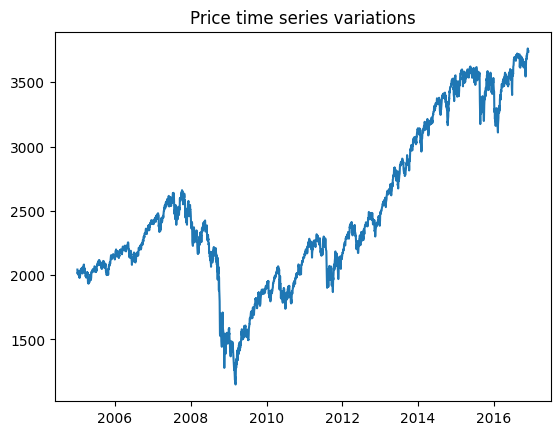

Analysis of Signal 1 :




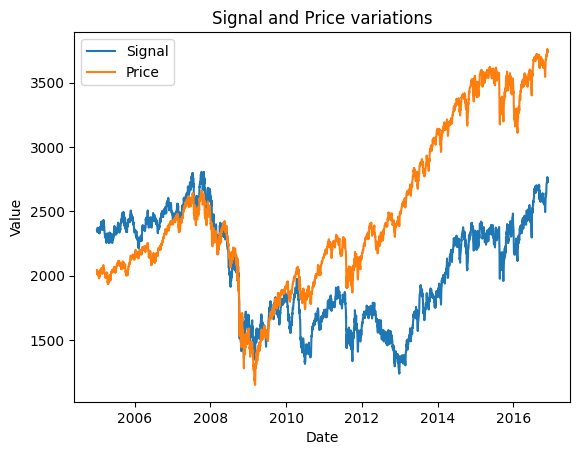

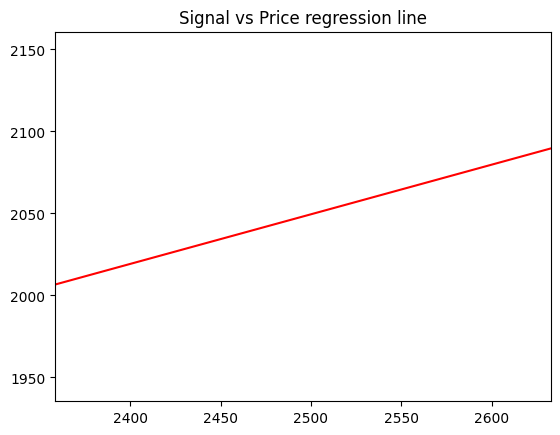

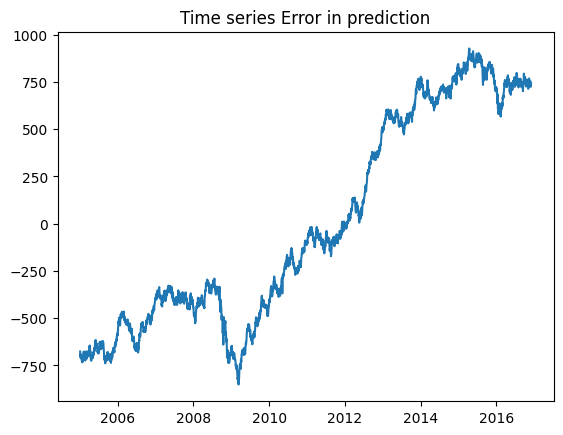

Correlation between Signal and Price: 0.471209677110326
Root mean squared Error: Rs. 552.088247137907 
For an average price value: Rs. 2495.6339773333334
F-statistic: 855.6614349916692
p-value: 1.086219188215706e-165
Coefficient of determination:  22.20385598024177 %
Signal 1 = 0.30240255453621856 * Price +  1293.4385387336831
Model's accuracy:  77.87783576629168 %
For example, the predicted Price at 2048.1246286666665 Signal is Rs. 2495.6339773333334 


Analysis of Signal 2 :




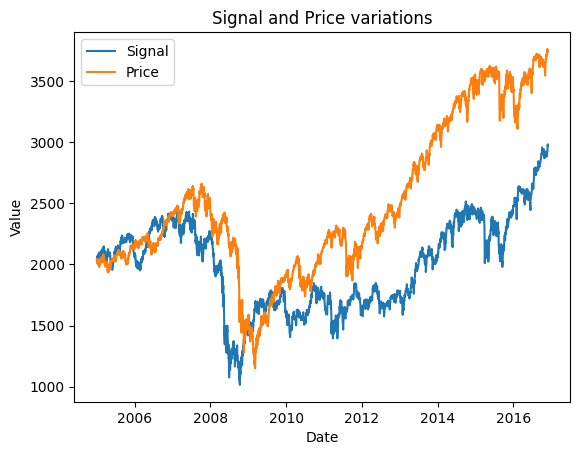

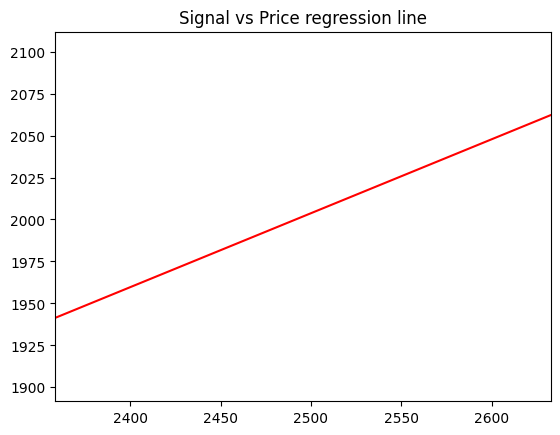

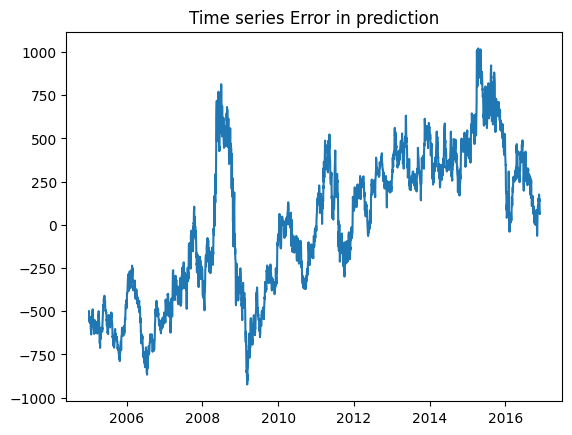

Correlation between Signal and Price: 0.7313066263973396
Root mean squared Error: Rs. 426.9184656237767 
For an average price value: Rs. 2495.6339773333334
F-statistic: 3446.66995418347
p-value: 0.0
Coefficient of determination:  53.480938181265756 %
Signal 2 = 0.44044635076866995 * Price +  902.6020375292314
Model's accuracy:  82.89338622966045 %
For example, the predicted Price at 2001.7949156999998 Signal is Rs. 2495.633977333334 


Analysis of Signal 3 :




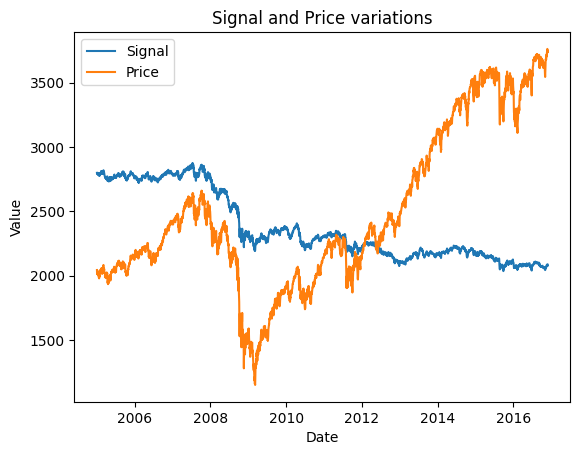

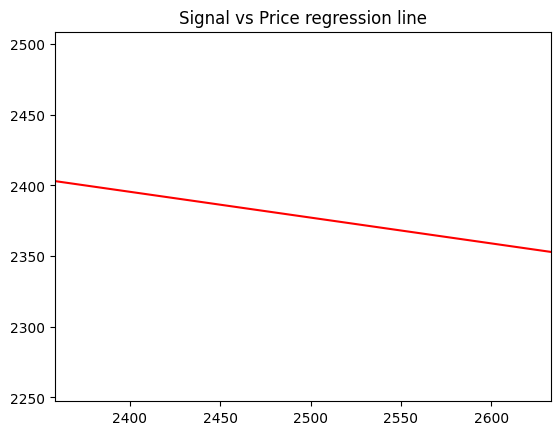

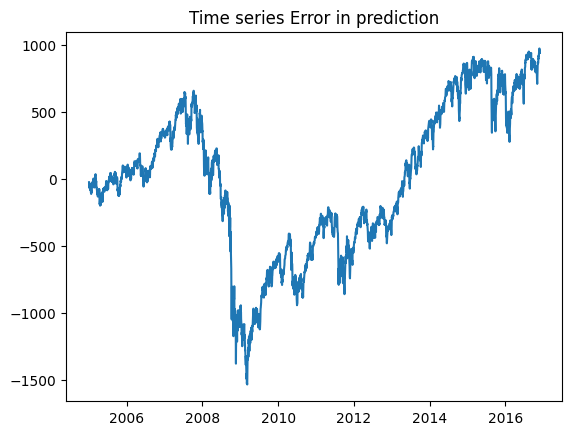

Correlation between Signal and Price: -0.4307665690769608
Root mean squared Error: Rs. 564.8837183254589 
For an average price value: Rs. 2495.6339773333334
F-statistic: 683.0561859857503
p-value: 8.063563053144728e-136
Coefficient of determination:  18.555983703433597 %
Signal 3 = -0.18260651599376174 * Price +  2833.759369638161
Model's accuracy:  77.36512150996376 %
For example, the predicted Price at 2378.0403438416665 Signal is Rs. 2495.6339773333325 


Analysis of Signal 4 :




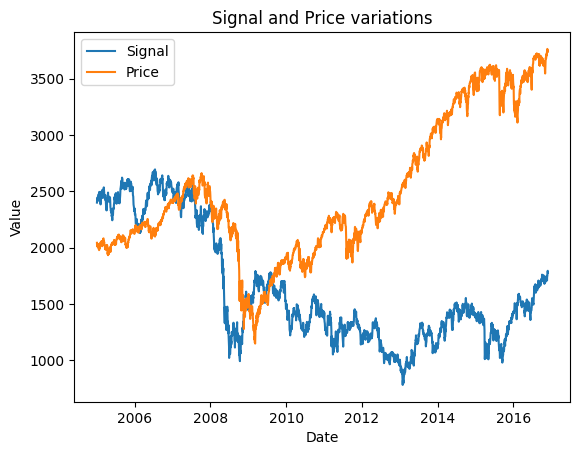

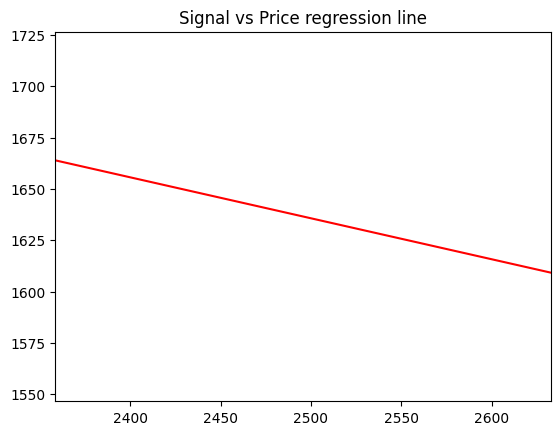

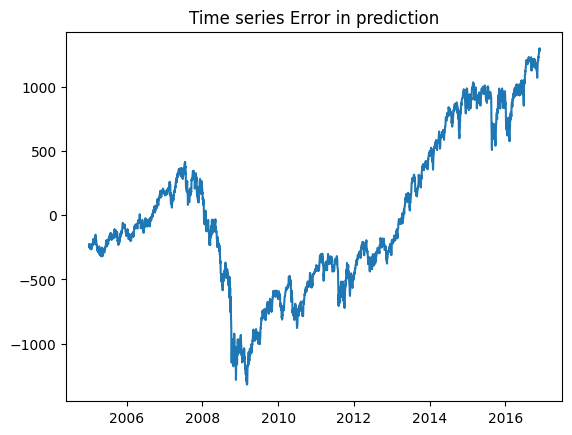

Correlation between Signal and Price: -0.243145367028955
Root mean squared Error: Rs. 607.1509248679906 
For an average price value: Rs. 2495.6339773333334
F-statistic: 188.3775900503418
p-value: 1.2688134323008284e-41
Coefficient of determination:  5.9119669507645245 %
Signal 4 = -0.19947337972584278 * Price +  2134.407328383994
Model's accuracy:  75.67147544942664 %
For example, the predicted Price at 1636.5947843666665 Signal is Rs. 2495.6339773333334 


Analysis of Signal 5 :




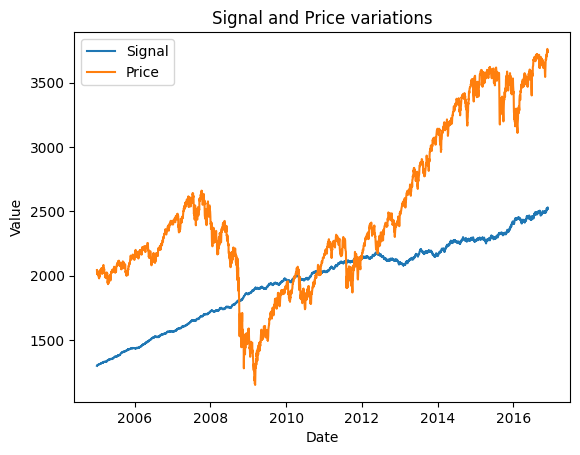

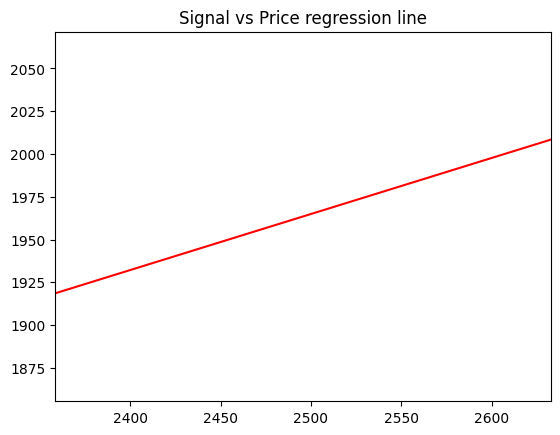

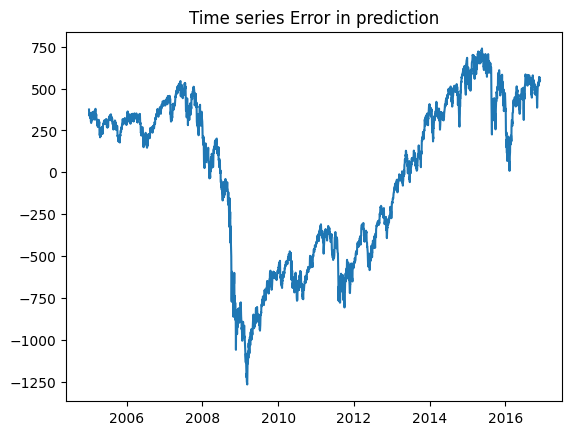

Correlation between Signal and Price: 0.6383122591275368
Root mean squared Error: Rs. 481.83095890309266 
For an average price value: Rs. 2495.6339773333334
F-statistic: 2061.4249556347836
p-value: 0.0
Coefficient of determination:  40.74425401524995 %
Signal 5 = 0.3274065765733174 * Price +  1146.3941256179078
Model's accuracy:  80.69304380051979 %
For example, the predicted Price at 1963.4811025166666 Signal is Rs. 2495.633977333334 


Analysis of Signal 6 :




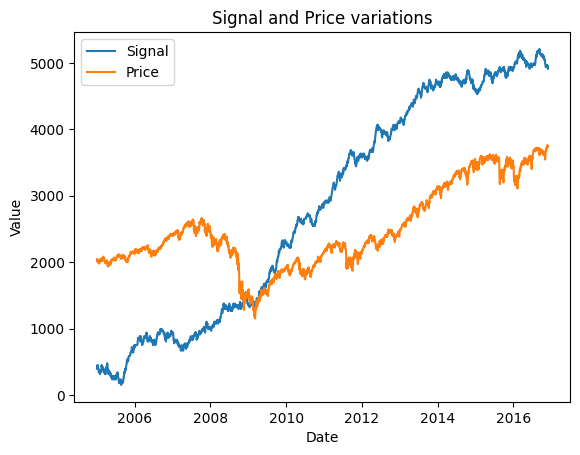

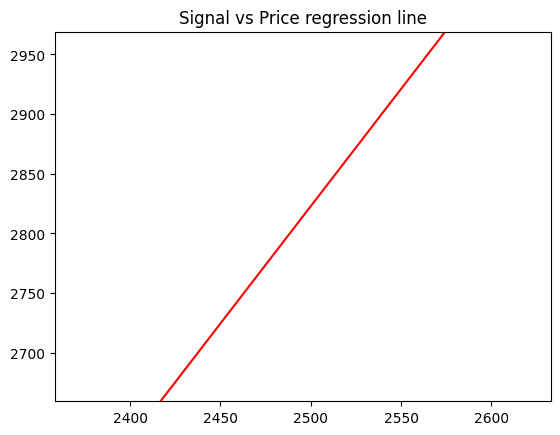

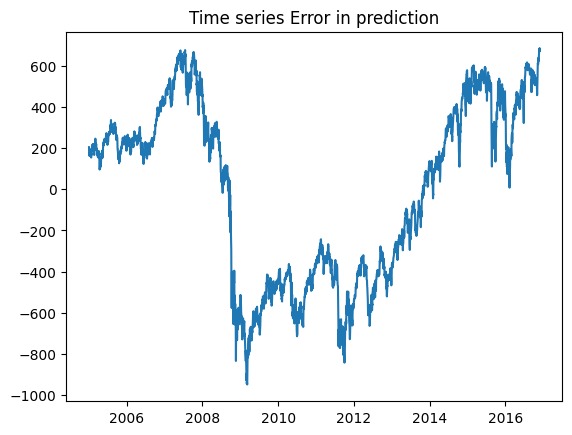

Correlation between Signal and Price: 0.7302250919872759
Root mean squared Error: Rs. 427.6431754069891 
For an average price value: Rs. 2495.6339773333334
F-statistic: 3424.8454136975934
p-value: 0.0
Coefficient of determination:  53.322868496782505 %
Signal 6 = 1.9649458665085873 * Price +  -2089.5376680795184
Model's accuracy:  82.86434712417484 %
For example, the predicted Price at 2814.248 Signal is Rs. 2495.6339773333334 


Analysis of Signal 7 :




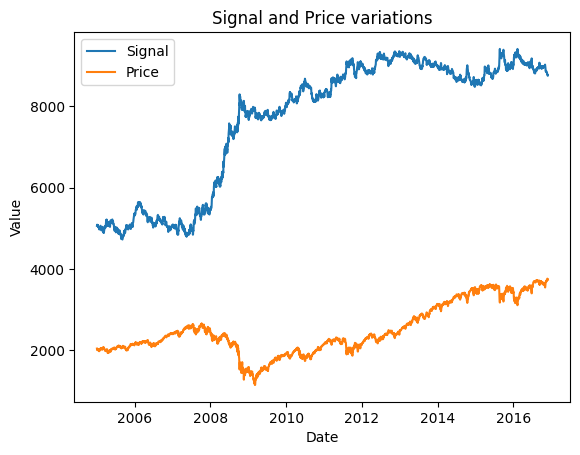

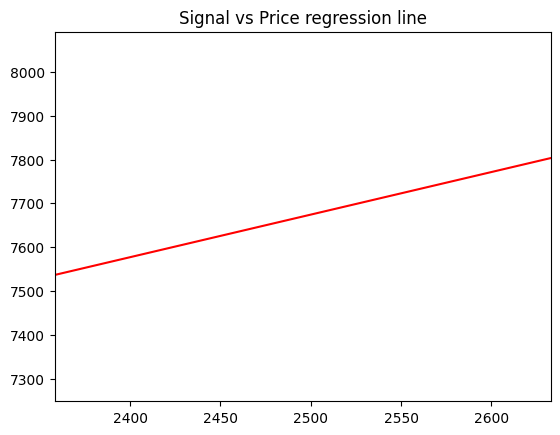

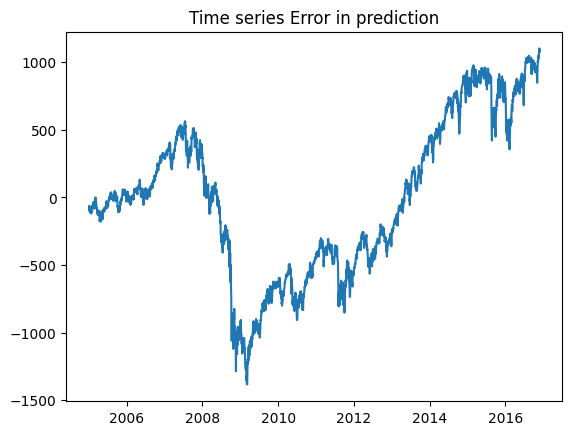

Correlation between Signal and Price: 0.3801179639742083
Root mean squared Error: Rs. 578.9513833407218 
For an average price value: Rs. 2495.6339773333334
F-statistic: 506.3410730769351
p-value: 9.736006713317863e-104
Coefficient of determination:  14.448966653589746 %
Signal 7 = 0.9719938680174554 * Price +  5244.2542176826555
Model's accuracy:  76.8014304742176 %
For example, the predicted Price at 7669.995140466668 Signal is Rs. 2495.633977333333 




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
data = pd.read_csv("/content/drive/MyDrive/finclub_dataset.csv")
data=data.interpolate(method='linear')
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)
plt.plot(data['Date'] ,data['Price'])
plt.title('Price time series variations')
plt.show()
z=[data['Signal1'],data['Signal2'],data['Signal3'],data['Signal4'],data['Signal5'],data['Signal6'],data['Signal7']]
i=1
for signal in z:
  print("Analysis of Signal",i,":\n\n")
  correlation = signal.corr(data['Price'])
  plt.plot(data['Date'], signal, label='Signal')
  plt.plot(data['Date'], data['Price'], label='Price')
  plt.legend()
  plt.xlabel('Date')
  plt.ylabel('Value')
  plt.title('Signal and Price variations')
  plt.show()
  model=LinearRegression()
  x=np.reshape(np.array(data['Price']),(-1, 1))
  y=np.reshape(np.array(signal),(-1, 1))
  model.fit(x,y)
  r_square = model.score(x,y)
  c=float(model.intercept_)
  m=float(model.coef_)
  Signal=signal.mean()
  Price=(Signal-c)/m
  x1=[Price,0]
  y1=[Signal,c]
  plt.axline(xy1=(Price, Signal), slope=m, color='r')
  plt.title('Signal vs Price regression line')
  plt.show()
  X = np.array(signal)
  y = np.array(data['Price'])
  X = sm.add_constant(X)
  model = sm.OLS(y, X)
  results = model.fit()
  f_statistic = results.fvalue
  p_value = results.f_pvalue
  predict=results.predict(X)
  mse = mean_squared_error(y, predict)
  plt.plot(data['Date'],y-predict)
  plt.title('Time series Error in prediction')
  plt.show()
  print('Correlation between Signal and Price:', correlation)
  print("Root mean squared Error: Rs.",np.sqrt(mse),"\nFor an average price value: Rs.",data['Price'].mean())
  print("F-statistic:", f_statistic)
  print("p-value:", p_value)
  print("Coefficient of determination: ", r_square*100,"%")
  print("Signal",i,"=",m,"* Price + ",c)
  accuracy=100-(np.sqrt(mse)*100/data['Price'].mean())
  print("Model's accuracy: ",accuracy,"%" )
  print("For example, the predicted Price at",Signal,"Signal is Rs.",Price,"\n\n")
  i=i+1

**Brief description about the analysis:**

The above code demonstates price prediction from signals using linear regression model.

First I filled the missing datas in certain signals with it's previous value from the corresponding columns.

Then started with creating plots for price vs date, price & signals vs date, used sklearn and statsmodel to form a regression model with the given data set.

With some inbuilt functions in those libraries I managed to get some correlation values, error estimation and error timeseries plot. Coefficient of determination, f-statistic and p-value signify the statistical prediction of this model.

The SD between predicted and original value gives us an approximate error estimation in price prediction using the Linear regression model.


**Result Analysis:**

**Linear Regression:** Simple linear regression is used to model the relationship between two continuous variables. The main objective is to predict the value of an output variable (response) based on the value of an input (predictor) variable.

**P_value and F_statistic:**  These parameters shows the true statistical significance of the model, From the values obtained we can see all the signals has extremely low P_value and high F_statistic, hence indicates a strong evidence against the null hypothesis, suggesting a highly significant relationship between price and signals.

**Coefficient of determination:** Gives us a brief insight into percentage of data that fits in the proposed regression model. The values shows it's quite poor in case of Signal 3,4 and 7 and relatively better in case of other signals.

**Correlation coefficient:** A correlation coefficient measures the strength and direction of the linear relationship between two variables. Signal 1,2,5,6 and 7 shows positive correlation with price whereas 3 and 4 shows negative correlation. From it's magnitude we can say signals 2,5 and 6 shows strong positive correlation with price.

**Root Mean Squared Error**:  The lower the RMSE value, the better the model's predictive accuracy, as smaller deviations indicate a closer fit to the observed data. Frrom avg stock price and using RMSE value we can calculate the model's accuracy in determing the price at a given signal

**Regression Model Accuracy**: All the above said parameters are crucial in calculating a linear regression model's accuracy. Thus by taking into account of these values we can conclude compared to all other signals Signal5 and Signal6 best fits in this model and gives a decent prediction in price with comparatively less deviation in most of times.


So, concluding I did analysing the relationship between the price and signal using a simple linear regression model, this model can be improvised and better methods like Polynomial and exponential Regression methods, can be employed to predict the relationship and predict price with better accuracy.

